##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch Data

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Convert Target to Binary

In [3]:
df['y'] = df['y'].apply(lambda row: 0 if row == 'no' else 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
def describe(df):
    listItem = []
    for col in df.columns :
        listItem.append([col, df[col].dtype, df[col].isna().sum(), 
                         round((df[col].isna().sum()/len(df[col])) * 100,2),
                        df[col].nunique(), list(df[col].unique()[:2])]);

    dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                                   'nullPct', 'unique', 'uniqueSample'],
                         data=listItem)
    return dfDesc

In [7]:
describe(df)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57]"
1,job,object,0,0.0,12,"[housemaid, services]"
2,marital,object,0,0.0,4,"[married, single]"
3,education,object,0,0.0,8,"[basic.4y, high.school]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[no, yes]"
6,loan,object,0,0.0,3,"[no, yes]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun]"
9,day_of_week,object,0,0.0,5,"[mon, tue]"


# Imbalance Classification

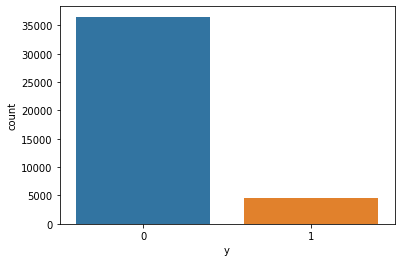

In [8]:
sns.countplot(x='y', data=df)

# EDA

### Looking at Bank Client Data

In [9]:
client = df.iloc[:, :7]
client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [10]:
describe(client)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57]"
1,job,object,0,0.0,12,"[housemaid, services]"
2,marital,object,0,0.0,4,"[married, single]"
3,education,object,0,0.0,8,"[basic.4y, high.school]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[no, yes]"
6,loan,object,0,0.0,3,"[no, yes]"


### Looking at unique values

In [11]:
print('Jobs:\n', client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [12]:
print('Marital:\n', client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [13]:
print('Education:\n', client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [14]:
print('Default:\n', client['default'].unique())

Default:
 ['no' 'unknown' 'yes']


In [15]:
print('Housing:\n', client['housing'].unique())

Housing:
 ['no' 'yes' 'unknown']


In [16]:
print('Loan:\n', client['loan'].unique())

Loan:
 ['no' 'yes' 'unknown']


### Age distribution

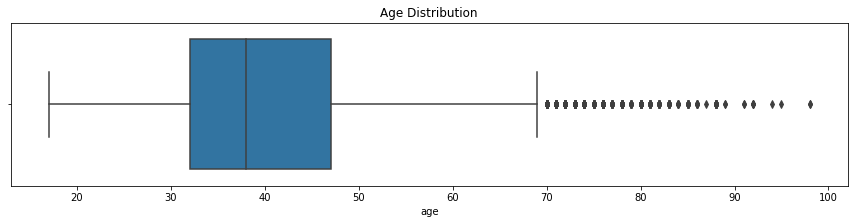

In [17]:
plt.figure(figsize=(15, 3))
plt.title('Age Distribution')
sns.boxplot(x = 'age', data = client, orient = 'h')

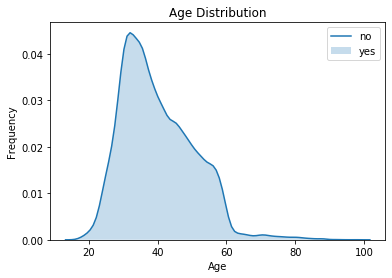

In [18]:
sns.kdeplot(client['age'], shade=True)
plt.title('Age Distribution')
plt.legend(['no','yes'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

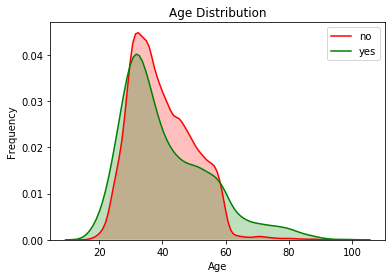

In [19]:
sns.kdeplot(df[df['y']== 0]['age'], color='red', shade=True)
sns.kdeplot(df[df['y']== 1]['age'], color='green', shade=True)
plt.legend(['no','yes'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Age Outliers

In [20]:
print('1st Quartile: ', client['age'].quantile(q = 0.25))
print('2nd Quartile: ', client['age'].quantile(q = 0.50))
print('3rd Quartile: ', client['age'].quantile(q = 0.75))
print('4th Quartile: ', client['age'].quantile(q = 1.00))
    
print('Ages above: ', client['age'].quantile(q = 0.75) + 
                      1.5*(client['age'].quantile(q = 0.75) - client['age'].quantile(q = 0.25)), 'are outliers')
print('Ages below: ', client['age'].quantile(q = 0.25) - 
                      1.5*(client['age'].quantile(q = 0.75) - client['age'].quantile(q = 0.25)), 'are outliers')

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
Ages above:  69.5 are outliers
Ages below:  9.5 are outliers


In [21]:
print('Number of high outliers: ', client[client['age'] > 69.6]['age'].count())
print('Number of low outliers: ', client[client['age'] < 9.5]['age'].count())

print('Number of clients: ', len(client))

print('Outliers are:', round(client[client['age'] > 69.6]['age'].count()*100/len(client),2), '%')

Number of high outliers:  469
Number of low outliers:  0
Number of clients:  41188
Outliers are: 1.14 %


# Conclusion about age
Looking at the distribution graphs, we cannot separate the 'no' and 'yes' values explicitly. We need to look for other patterns. Since there are outliers, we can try to train the model with or without them.

# Job Distribution

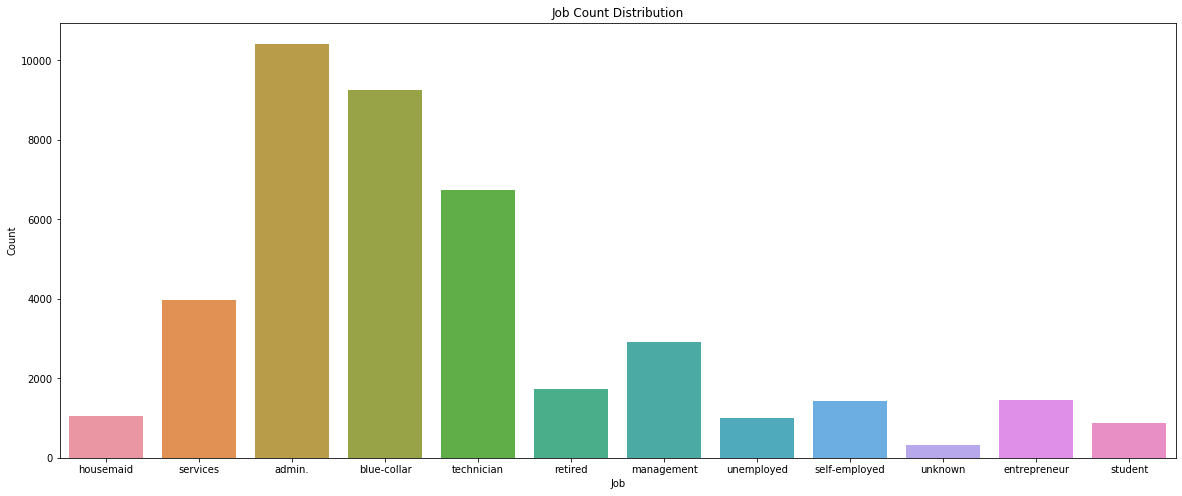

In [22]:
plt.figure(figsize=(20, 8))
sns.countplot(x = 'job', data = client)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Count Distribution')
plt.show()

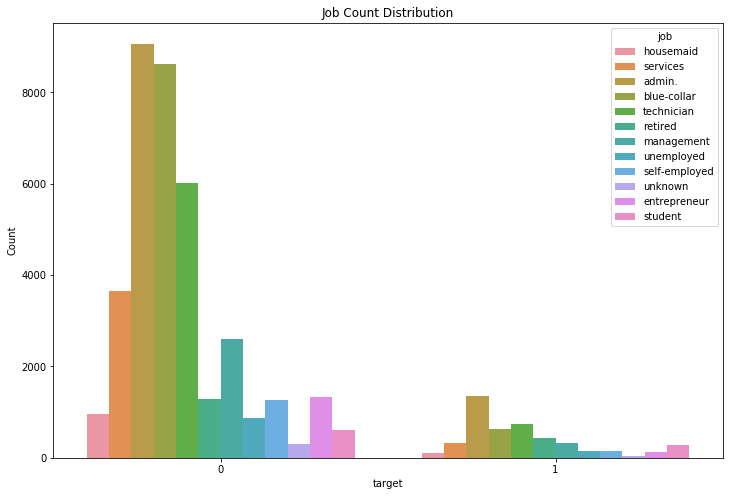

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'y', hue='job', data = df)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Job Count Distribution')
plt.show()

# Marital

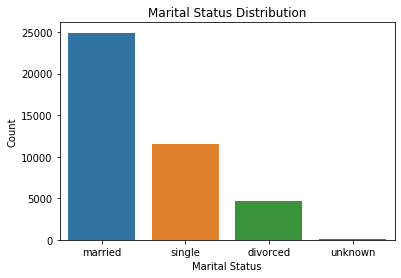

In [24]:
sns.countplot(x = 'marital', data = client)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

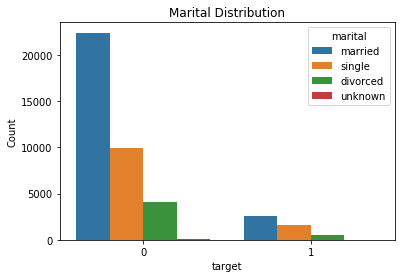

In [25]:
sns.countplot(x = 'y', hue='marital', data = df)
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Marital Distribution')
plt.show()

# Education

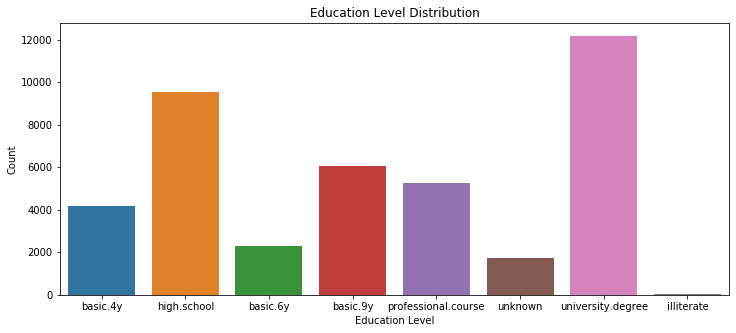

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'education', data = client)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

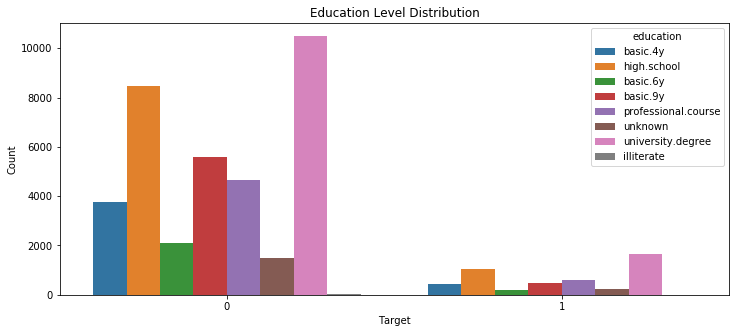

In [27]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'y', hue='education', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

# Default

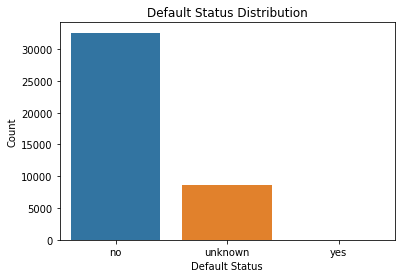

In [28]:
sns.countplot(x = 'default', data = client)
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.title('Default Status Distribution')
plt.show()

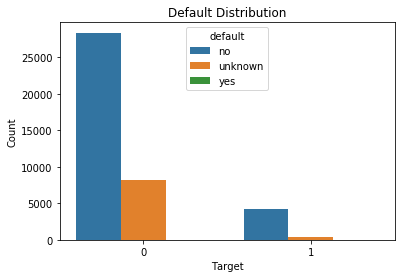

In [29]:
sns.countplot(x = 'y', hue='default', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Default Distribution')
plt.show()

# Housing

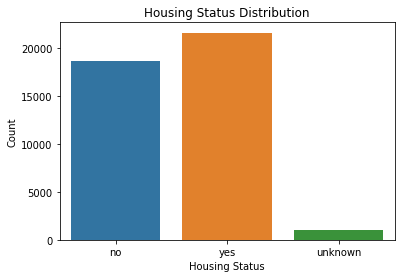

In [30]:
sns.countplot(x = 'housing', data = client)
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.title('Housing Status Distribution')
plt.show()

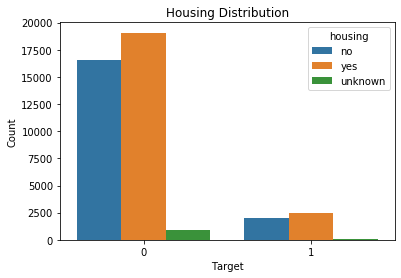

In [31]:
sns.countplot(x = 'y', hue='housing', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Housing Distribution')
plt.show()

# Loan

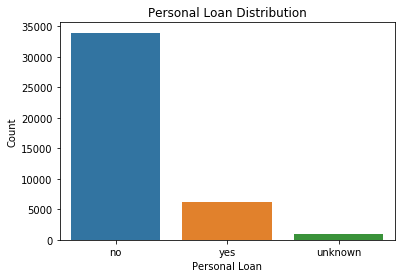

In [32]:
sns.countplot(x = 'loan', data = client)
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Personal Loan Distribution')
plt.show()

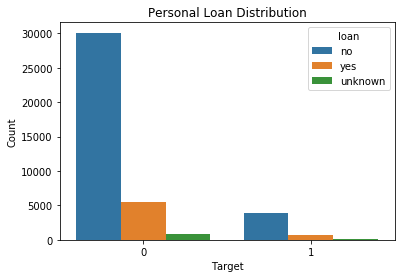

In [33]:
sns.countplot(x = 'y', hue='loan', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Personal Loan Distribution')
plt.show()

# Conclusion for features relating to bank clients:
Categorical features have very similar distribution/count whether the client ended up subscribing to the plan. This means these features presumably will have little to no effects to our prediction model. However, this is not certain, and actual evaluations of various models are needed.

# Related with last contact of the current campaign

In [34]:
related = df.iloc[:, 7:10]
related.head()

,contact,month,day_of_week
0,telephone,may,mon
1,telephone,may,mon
2,telephone,may,mon
3,telephone,may,mon
4,telephone,may,mon


In [35]:
print("Method of Contact: \n", related['contact'].unique())
print("\nCampaign working months: \n", related['month'].unique())
print("\nCampaign working days: \n", related['day_of_week'].unique())

Method of Contact: 
 ['telephone' 'cellular']

Campaign working months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Campaign working days: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


# Contact

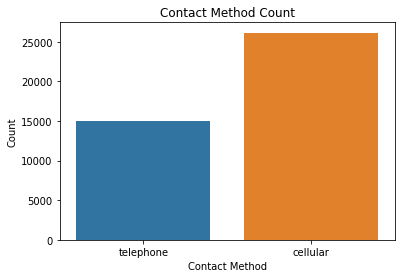

In [36]:
sns.countplot(x = 'contact', data = related)
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Contact Method Count')
plt.show()

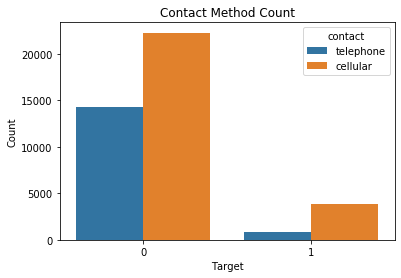

In [37]:
sns.countplot(x = 'y', hue='contact', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Contact Method Count')
plt.show()

# Month

In [38]:
month = related.groupby('month').count().sort_values(by='contact', ascending=False)

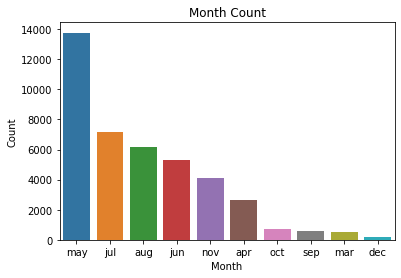

In [39]:
sns.countplot(x = 'month', data = related, order=month.index)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Count')
plt.show()

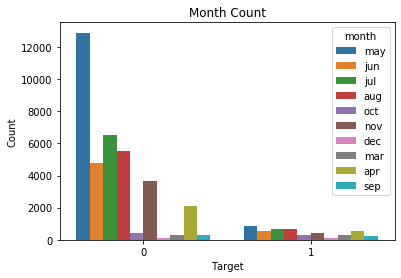

In [40]:
sns.countplot(x = 'y', hue='month', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Month Count')
plt.show()

# day_of_week

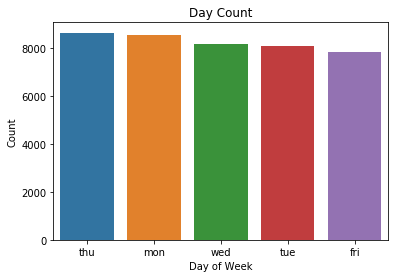

In [41]:
day = related.groupby('day_of_week').count().sort_values(by='contact', ascending=False)
sns.countplot(x = 'day_of_week', data = related, order=day.index)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Day Count')
plt.show()

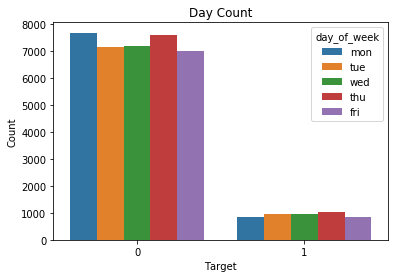

In [42]:
sns.countplot(x = 'y', hue='day_of_week', data = df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Day Count')
plt.show()

# Social and Economic Context

In [43]:
sea = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
sea.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [44]:
sea.describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [45]:
describe(sea)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,emp.var.rate,float64,0,0.0,10,"[1.1, 1.4]"
1,cons.price.idx,float64,0,0.0,26,"[93.994, 94.465]"
2,cons.conf.idx,float64,0,0.0,26,"[-36.4, -41.8]"
3,euribor3m,float64,0,0.0,316,"[4.857, 4.856]"
4,nr.employed,float64,0,0.0,11,"[5191.0, 5228.1]"


# Finding Outliers

In [46]:
for item in sea.columns:
    print(item, ':')
    print('1st Quartile: ', sea[item].quantile(q = 0.25))
    print('2nd Quartile: ', sea[item].quantile(q = 0.50))
    print('3rd Quartile: ', sea[item].quantile(q = 0.75))
    print('4th Quartile: ', sea[item].quantile(q = 1.00))

    print(f'{item} above: ', round(sea[item].quantile(q = 0.75) + 
                          1.5*(sea[item].quantile(q = 0.75) - sea[item].quantile(q = 0.25)), 2), 'are outliers')
    print(f'{item} below: ', round(sea[item].quantile(q = 0.25) - 
                          1.5*(sea[item].quantile(q = 0.75) - sea[item].quantile(q = 0.25)), 2), 'are outliers\n')

emp.var.rate :
1st Quartile:  -1.8
2nd Quartile:  1.1
3rd Quartile:  1.4
4th Quartile:  1.4
emp.var.rate above:  6.2 are outliers
emp.var.rate below:  -6.6 are outliers

cons.price.idx :
1st Quartile:  93.075
2nd Quartile:  93.749
3rd Quartile:  93.994
4th Quartile:  94.76700000000001
cons.price.idx above:  95.37 are outliers
cons.price.idx below:  91.7 are outliers

cons.conf.idx :
1st Quartile:  -42.7
2nd Quartile:  -41.8
3rd Quartile:  -36.4
4th Quartile:  -26.9
cons.conf.idx above:  -26.95 are outliers
cons.conf.idx below:  -52.15 are outliers

euribor3m :
1st Quartile:  1.344
2nd Quartile:  4.857
3rd Quartile:  4.961
4th Quartile:  5.045
euribor3m above:  10.39 are outliers
euribor3m below:  -4.08 are outliers

nr.employed :
1st Quartile:  5099.1
2nd Quartile:  5191.0
3rd Quartile:  5228.1
4th Quartile:  5228.1
nr.employed above:  5421.6 are outliers
nr.employed below:  4905.6 are outliers



# Looking at Distribution

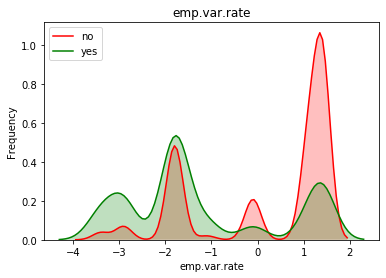

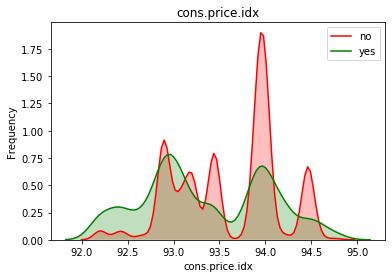

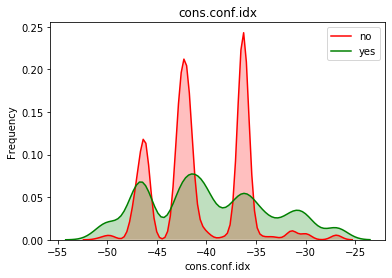

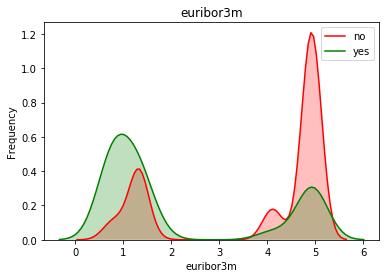

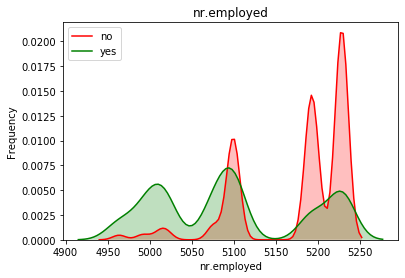

In [47]:
for item in sea.columns :
    sns.kdeplot(df[df['y']== 0][item], color='red', shade=True)
    sns.kdeplot(df[df['y']== 1][item], color='green', shade=True)
    plt.title(item)
    plt.legend(['no','yes'])
    plt.xlabel(item)
    plt.ylabel('Frequency')
    plt.show()

# Other Attributes

In [48]:
other = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [49]:
other.describe()

,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000
mean,2.567593,962.475454,0.172963
std,2.770014,186.910907,0.494901
min,1.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000
50%,2.000000,999.000000,0.000000
75%,3.000000,999.000000,0.000000
max,56.000000,999.000000,7.000000


In [50]:
describe(other)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,campaign,int64,0,0.0,42,"[1, 2]"
1,pdays,int64,0,0.0,27,"[999, 6]"
2,previous,int64,0,0.0,8,"[0, 1]"
3,poutcome,object,0,0.0,3,"[nonexistent, failure]"


# Finding Outliers

In [51]:
for item in other.select_dtypes(exclude=['object']).columns:
    print(item, ':')
    print('1st Quartile: ', other[item].quantile(q = 0.25))
    print('2nd Quartile: ', other[item].quantile(q = 0.50))
    print('3rd Quartile: ', other[item].quantile(q = 0.75))
    print('4th Quartile: ', other[item].quantile(q = 1.00))

    print(f'{item} above: ', round(other[item].quantile(q = 0.75) + 
                          1.5*(other[item].quantile(q = 0.75) - other[item].quantile(q = 0.25)), 2), 'are outliers')
    print(f'{item} below: ', round(other[item].quantile(q = 0.25) - 
                          1.5*(other[item].quantile(q = 0.75) - other[item].quantile(q = 0.25)), 2), 'are outliers\n')

campaign :
1st Quartile:  1.0
2nd Quartile:  2.0
3rd Quartile:  3.0
4th Quartile:  56.0
campaign above:  6.0 are outliers
campaign below:  -2.0 are outliers

pdays :
1st Quartile:  999.0
2nd Quartile:  999.0
3rd Quartile:  999.0
4th Quartile:  999.0
pdays above:  999.0 are outliers
pdays below:  999.0 are outliers

previous :
1st Quartile:  0.0
2nd Quartile:  0.0
3rd Quartile:  0.0
4th Quartile:  7.0
previous above:  0.0 are outliers
previous below:  0.0 are outliers



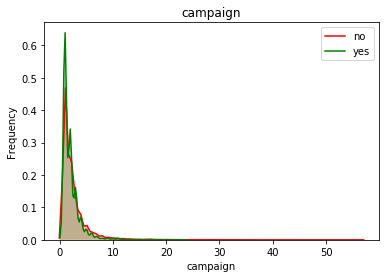

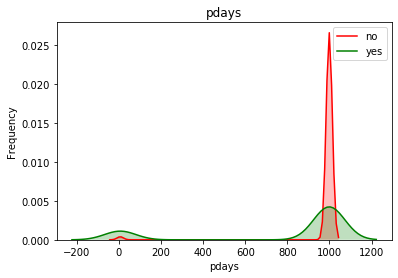

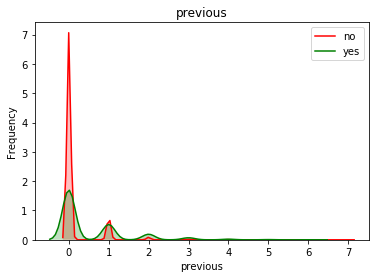

In [52]:
for item in other.select_dtypes(exclude=['object']).columns:
    sns.kdeplot(df[df['y']== 0][item], color='red', shade=True)
    sns.kdeplot(df[df['y']== 1][item], color='green', shade=True)
    plt.title(item)
    plt.legend(['no','yes'])
    plt.xlabel(item)
    plt.ylabel('Frequency')
    plt.show()

# Conclusion
Seems like other attributes have very similiar pattern regardless their target values. This indicates these features will not be enough to predict the outcome.

# Feature Engineering

### a. job

In [53]:
# df[['job', 'age']].groupby('job').count().sort_values(by='age', ascending=False)

In [54]:
# def fillJob(series):
#     if series in ['retired', 'unemployed', 'unknown']:
#         return series
#     else:
#         return 'employed'

In [55]:
# df['job2'] = df['job'].apply(fillJob)

In [56]:
# df.groupby('job2').count()

In [57]:
# sns.countplot(x='y', hue='job2', data=df)

### b. education

In [58]:
# df.groupby('education').count().sort_values(by='age', ascending=False)

In [59]:
# def fillEducation(series):
#     if series in ['university.degree', 'high.school']:
#         return series
#     else:
#         return 'other'

In [60]:
# df['edu2'] = df['education'].apply(fillEducation)

In [61]:
# df.groupby('edu2').count().sort_values(by='age', ascending=False)

In [62]:
# sns.countplot(x='y', hue='edu2', data=df)

### c. marital

In [63]:
# df.groupby('marital').count()

In [64]:
# def fillMarital(series):
#     if series in ['married', 'single']:
#         return series
#     else:
#         return 'other'

In [65]:
# df['marital2'] = df['marital'].apply(fillMarital)

In [66]:
# sns.countplot(x='y', hue='marital2', data=df)

# One Hot Encoding
Let us try one hot encoding first to transform our data.

In [67]:
train = df.drop(columns=['duration', 'y'], axis=1)
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [68]:
describe(train)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57]"
1,job,object,0,0.0,12,"[housemaid, services]"
2,marital,object,0,0.0,4,"[married, single]"
3,education,object,0,0.0,8,"[basic.4y, high.school]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[no, yes]"
6,loan,object,0,0.0,3,"[no, yes]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun]"
9,day_of_week,object,0,0.0,5,"[mon, tue]"


In [69]:
objects = df.select_dtypes(include='object').columns

In [70]:
train = pd.get_dummies(train, drop_first=True, columns=objects)

In [71]:
describe(train)

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57]"
1,campaign,int64,0,0.0,42,"[1, 2]"
2,pdays,int64,0,0.0,27,"[999, 6]"
3,previous,int64,0,0.0,8,"[0, 1]"
4,emp.var.rate,float64,0,0.0,10,"[1.1, 1.4]"
5,cons.price.idx,float64,0,0.0,26,"[93.994, 94.465]"
6,cons.conf.idx,float64,0,0.0,26,"[-36.4, -41.8]"
7,euribor3m,float64,0,0.0,316,"[4.857, 4.856]"
8,nr.employed,float64,0,0.0,11,"[5191.0, 5228.1]"
9,job_blue-collar,uint8,0,0.0,2,"[0, 1]"


# Train Test Split

In [72]:
target = df['y']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(train,target,test_size=0.30, random_state=101)

# Create Model

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

In [75]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)

In [76]:
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

# Training Error

In [77]:
def Error(x_data, y_data, model):
    predict = model.predict(x_data)
    predictProb = model.predict_proba(x_data)

    con = pd.DataFrame(data=confusion_matrix(y_data, predict), columns=['P No', 'P Yes'], 
                       index=['A No', 'A Yes']);
    print('Confusion Matrix: \n', con, '\n')

    print('Classification Report: \n', classification_report(y_data,predict))

    print('Accuracy : ' + str(accuracy_score(y_data,predict)))
    
    print('Log Loss: ', log_loss(y_data, predictProb[:, 1]))

    # calculate the fpr and tpr for all thresholds of the classification
    preds = predictProb[:,1]
    fpr, tpr, threshold = roc_curve(y_data, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc,2)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Confusion Matrix: 
         P No  P Yes
A No   25544     26
A Yes    117   3144 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25570
           1       0.99      0.96      0.98      3261

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

Accuracy : 0.9950400610454025
Log Loss:  0.06748028045701905


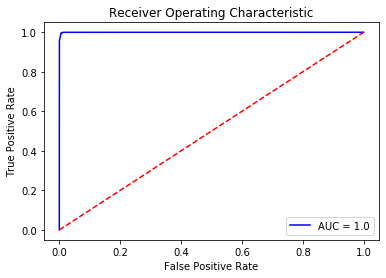

In [78]:
Error(xtr, ytr, rfc)

### Feature Importances

In [79]:
def FeatureImportancesPlot(model, x_data):
    plt.figure(figsize=(12, 5))
    coef1 = pd.Series(model.feature_importances_, x_data.columns).sort_values(ascending = False)
    coef1.plot(kind='bar', title='Feature Importances')

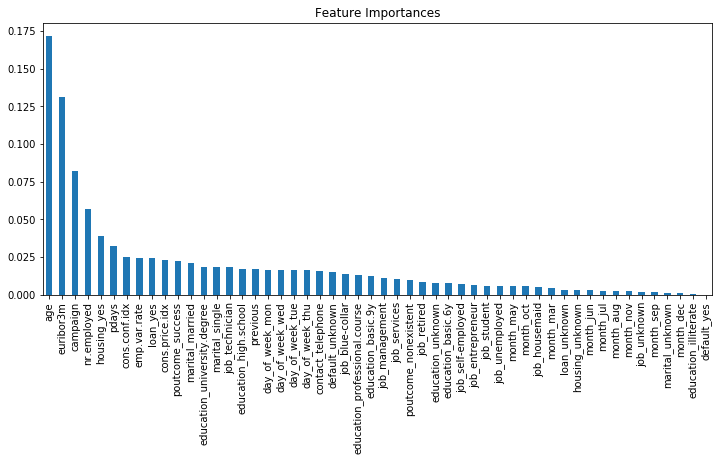

In [80]:
FeatureImportancesPlot(rfc, xtr)

# Test Error

Confusion Matrix: 
         P No  P Yes
A No   10645    333
A Yes    974    405 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10978
           1       0.55      0.29      0.38      1379

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.66     12357
weighted avg       0.88      0.89      0.88     12357

Accuracy : 0.894229991098163
Log Loss:  0.508874519295476


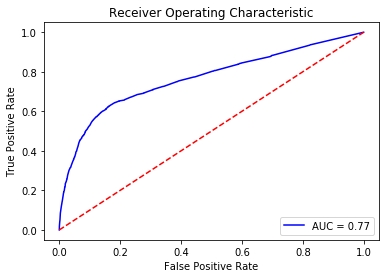

In [81]:
Error(xts, yts, rfc)

# Learning Curve

In [82]:
from sklearn.model_selection import learning_curve

def learningCurve(model, x_data, y_data):

    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                           X=x_data,
                                                           y=y_data,
                                                           train_sizes=np.linspace(0.3, 1.0, 5),
                                                           cv=10,
                                                           scoring='accuracy')

    print('\nTrain Scores : ')
    print(train_scores)
    # Mean value of accuracy against training data
    train_mean = np.mean(train_scores, axis=1)
    print('\nTrain Mean : ')
    print(train_mean)
    print('\nTrain Size : ')
    print(train_sizes)
    # Standard deviation of training accuracy per number of training samples
    train_std = np.std(train_scores, axis=1)
    print('\nTrain Std : ')
    print(train_std)

    # Same as above for test data
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    print('\nTest Scores : ')
    print(test_scores)
    print('\nTest Mean : ')
    print(test_mean)
    print('\nTest Std : ')
    print(test_std)

    # Plot training accuracies 
    plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
    # Plot the variance of training accuracies
    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='red')

    # Plot for test data as training data
    plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
            label='Test Accuracy')
    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='blue')

    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# K Fold

In [83]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    logloss = log_loss(y_train,predictProba)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'logloss': logloss
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    logloss = log_loss(y_test,predictProba)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'logloss': logloss
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [84]:
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

In [85]:
def kfoldeval(x_data, y_data, model):
    
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(x_data, y_data):

        # split data
        X_train, X_val = x_data.iloc[train_index], x_data.iloc[val_index]
        y_train, y_val = y_data.iloc[train_index], y_data.iloc[val_index]

        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)

        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)


    listItem = []

    for tr,val in zip(train_errors,validation_errors) :
        listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                         tr['logloss'],val['logloss']])

    listItem.append(list(np.mean(listItem,axis=0)))

    dfEvaluate = pd.DataFrame(listItem, 
                        columns=['Train Accuracy', 
                                'Test Accuracy', 
                                'Train ROC AUC', 
                                'Test ROC AUC', 
                                'Train F1 Score',
                                'Test F1 Score',
                                'Train Log Loss',
                                'Test Log Loss'])
    listIndex = list(dfEvaluate.index)
    listIndex[-1] = 'Average'
    dfEvaluate.index = listIndex
    
    return dfEvaluate

# RFC Conclusion
With 'duration' column dropped, the model overfits and creates fair predictive capabilities. Less relevant features need to be dropped, and some data need grouping. Might replace one hot encoding with label encoder.

# Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtr, ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Decision Tree Training Error

Confusion Matrix: 
         P No  P Yes
A No   25567      3
A Yes    139   3122 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     25570
           1       1.00      0.96      0.98      3261

    accuracy                           1.00     28831
   macro avg       1.00      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

Accuracy : 0.9950747459331969
Log Loss:  0.007254659331628678


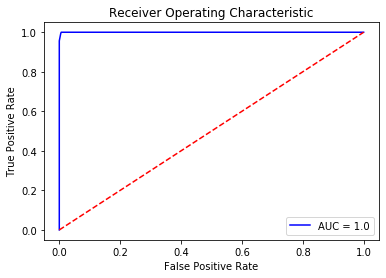

In [87]:
Error(xtr, ytr, dtc)

# Decision Tree Test Error

Confusion Matrix: 
        P No  P Yes
A No   9958   1020
A Yes   933    446 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     10978
           1       0.30      0.32      0.31      1379

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.61     12357
weighted avg       0.85      0.84      0.84     12357

Accuracy : 0.8419519300801165
Log Loss:  5.413507466663478


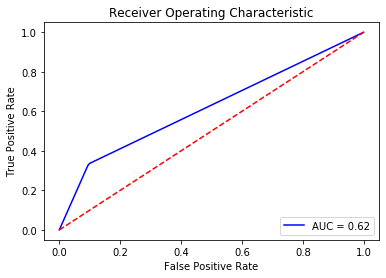

In [88]:
Error(xts, yts, dtc)

# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtr, ytr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Gradient Boosting Train Error

Confusion Matrix: 
         P No  P Yes
A No   25204    366
A Yes   2377    884 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.71      0.27      0.39      3261

    accuracy                           0.90     28831
   macro avg       0.81      0.63      0.67     28831
weighted avg       0.89      0.90      0.89     28831

Accuracy : 0.9048593527799937
Log Loss:  0.2654880467087421


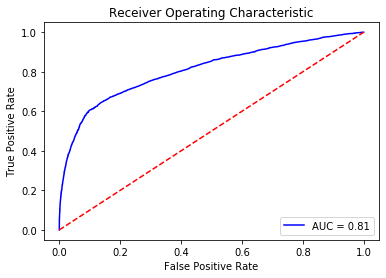

In [90]:
Error(xtr, ytr, gbc)

# Gradient Boosting Test Error

Confusion Matrix: 
         P No  P Yes
A No   10815    163
A Yes   1039    340 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.25      0.36      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.62      0.65     12357
weighted avg       0.89      0.90      0.88     12357

Accuracy : 0.9027271991583717
Log Loss:  0.27319433072926347


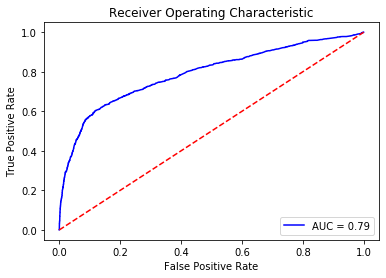

In [91]:
Error(xts, yts, gbc)

# XGB Classifier

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# XGB Train Error

Confusion Matrix: 
         P No  P Yes
A No   25233    337
A Yes   2464    797 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.70      0.24      0.36      3261

    accuracy                           0.90     28831
   macro avg       0.81      0.62      0.66     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9028476292879193
Log Loss:  0.2660187200637243


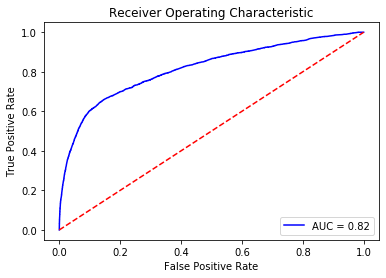

In [93]:
Error(xtr, ytr, xgb)

# XGB Test Error

Confusion Matrix: 
         P No  P Yes
A No   10833    145
A Yes   1073    306 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.22      0.33      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.9014323865015781
Log Loss:  0.272617154344847


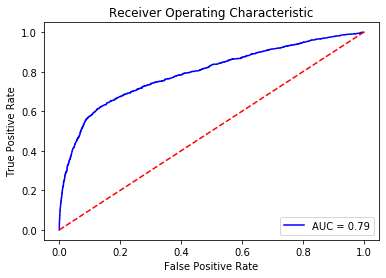

In [94]:
Error(xts, yts, xgb)

# Conclusion
From minimally processed data, the best prediction that we get is from Gradient Boosting and XGBoost. Both have same roc_auc with XGBoost winning slightly in terms of precision and recall of positive ('1') value. Let us try eliminating some features and play with the training data a bit more, seeing if we can accomplish better test error evaluation values.

# Looking at Feature Importances

In [95]:
def FeatureImportances(model1, model2, model3, x_train_data):
    featureImportances = []
    rfcFeatureImportances = pd.Series(model1.feature_importances_, x_train_data.columns).sort_values(ascending=False)
    gbcFeatureImportances = pd.Series(model2.feature_importances_, x_train_data.columns).sort_values(ascending=False)
    xgbFeatureImportances = pd.Series(model3.feature_importances_, x_train_data.columns).sort_values(ascending=False)

    for item in range(len(xtr.columns)):
        feature = []
        feature.append(rfcFeatureImportances.index[item])
        feature.append(round(rfcFeatureImportances.iloc[item], 2))
        feature.append(gbcFeatureImportances.index[item])
        feature.append(round(gbcFeatureImportances.iloc[item], 2))
        feature.append(xgbFeatureImportances.index[item])
        feature.append(round(xgbFeatureImportances.iloc[item], 2))
        featureImportances.append(feature)

    df_feature_importances = pd.DataFrame(data=featureImportances, columns=['rfc features', "rfc features' values",
                                                                           'gbc features', "gbc features' values",
                                                                           'xgb features', "xgb features' values"])
    return df_feature_importances

In [96]:
FeatureImportances(rfc, gbc, xgb, xtr)

,rfc features,rfc features' values,gbc features,gbc features' values,xgb features,xgb features' values
0,age,0.17,nr.employed,0.60,nr.employed,0.44
1,euribor3m,0.13,pdays,0.08,poutcome_success,0.11
2,campaign,0.08,euribor3m,0.08,pdays,0.05
3,nr.employed,0.06,cons.conf.idx,0.06,euribor3m,0.04
4,housing_yes,0.04,poutcome_success,0.04,cons.conf.idx,0.04
5,pdays,0.03,age,0.03,month_oct,0.02
6,cons.conf.idx,0.02,month_oct,0.02,contact_telephone,0.02
7,emp.var.rate,0.02,contact_telephone,0.02,default_unknown,0.02
8,loan_yes,0.02,campaign,0.01,month_may,0.02
9,cons.price.idx,0.02,cons.price.idx,0.01,previous,0.02


# Conclusion
Since our rfc model determines 'age' as its most important feature, let us treat the outliers first to see if it would significantly improve the model. Decision Tree Classifier has a really bad roc_auc score, so it hardly becomes any useful for our future evaluation.

# Treating Outliers in 'age' Column

In [97]:
ageTreated = df.drop(columns=['y', 'duration'])
ageTreated['age'] = ageTreated['age'].apply(lambda row: 69.6 if row > 69.6 else row)
ageTreated = pd.get_dummies(ageTreated, drop_first=True, columns=objects)

In [98]:
ageTreated['age'][ageTreated['age'] == 69.6].count()

469

# Random Forest Classifier

In [99]:
xtr, xts, ytr, yts = train_test_split(ageTreated,target,test_size=0.30, random_state=101)
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Confusion Matrix: 
         P No  P Yes
A No   25544     26
A Yes    118   3143 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25570
           1       0.99      0.96      0.98      3261

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       0.99      1.00      0.99     28831

Accuracy : 0.9950053761576081
Log Loss:  0.06749190250714177


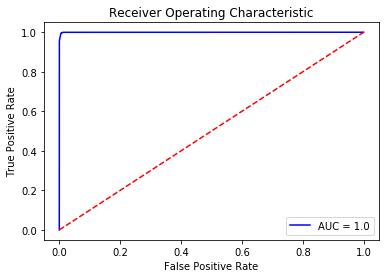

In [100]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10649    329
A Yes    982    397 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10978
           1       0.55      0.29      0.38      1379

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357

Accuracy : 0.8939062879339645
Log Loss:  0.4915920918560796


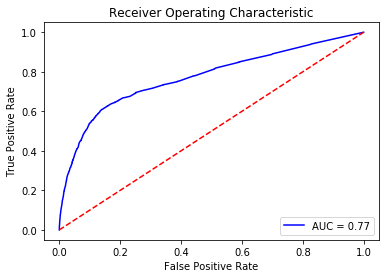

In [101]:
Error(xts, yts, rfc)

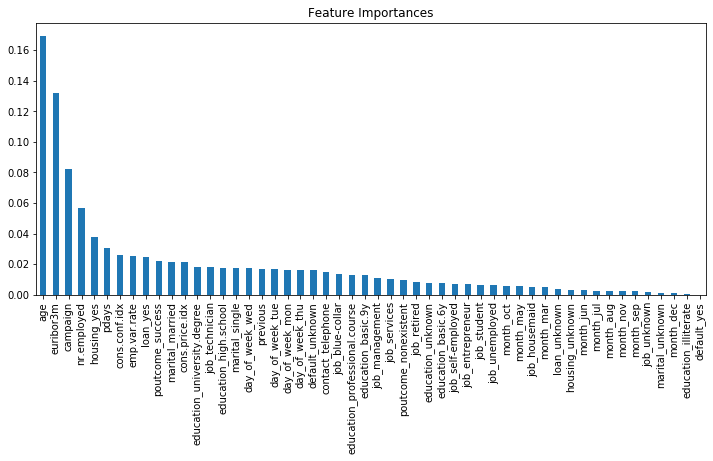

In [102]:
FeatureImportancesPlot(rfc, xtr)

# Conclusion from treating 'age' outliers
No change in roc auc value, and the model still overfits. Lets try dropping more features. Since 'month' and 'day_of_week' have very little feature importance, and intuitively they do not affect the target, lets try dropping them first.

# Drop 'month' and 'day' columns

In [103]:
monthDayTreated = df.drop(columns=['y', 'duration', 'month', 'day_of_week'])
objects = monthDayTreated.select_dtypes(include=['object']).columns
monthDayTreated = pd.get_dummies(monthDayTreated, drop_first=True, columns=objects)

### Random Forest

In [104]:
xtr, xts, ytr, yts = train_test_split(monthDayTreated,target,test_size=0.30, random_state=101)
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Confusion Matrix: 
         P No  P Yes
A No   25541     29
A Yes    129   3132 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     25570
           1       0.99      0.96      0.98      3261

    accuracy                           0.99     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       0.99      0.99      0.99     28831

Accuracy : 0.9945197877284867
Log Loss:  0.06814185659863264


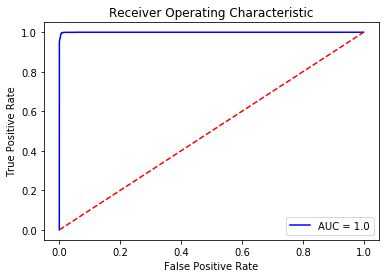

In [105]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10638    340
A Yes    987    392 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10978
           1       0.54      0.28      0.37      1379

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357

Accuracy : 0.8926114752771709
Log Loss:  0.5355507884369152


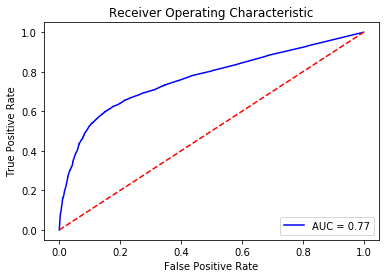

In [106]:
Error(xts, yts, rfc)

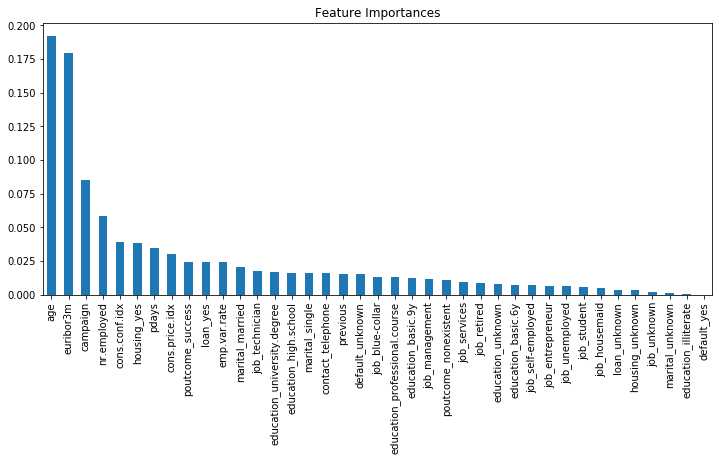

In [107]:
FeatureImportancesPlot(rfc, xtr)

### XGBoost

In [108]:
xgb = XGBClassifier()
xgb.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion Matrix: 
         P No  P Yes
A No   25227    343
A Yes   2484    777 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.69      0.24      0.35      3261

    accuracy                           0.90     28831
   macro avg       0.80      0.61      0.65     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9019458222052652
Log Loss:  0.2665914181858891


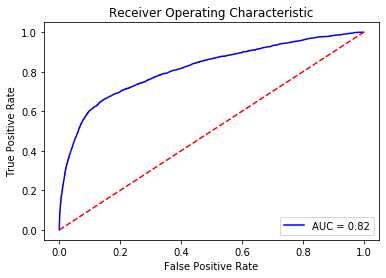

In [109]:
Error(xtr, ytr, xgb)

Confusion Matrix: 
         P No  P Yes
A No   10836    142
A Yes   1072    307 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.22      0.34      1379

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.9017560896657765
Log Loss:  0.2736547968744601


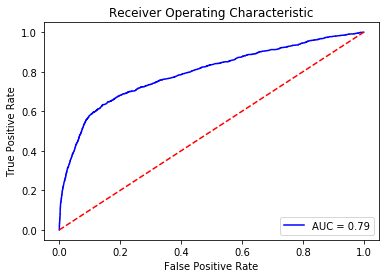

In [110]:
Error(xts, yts, xgb)

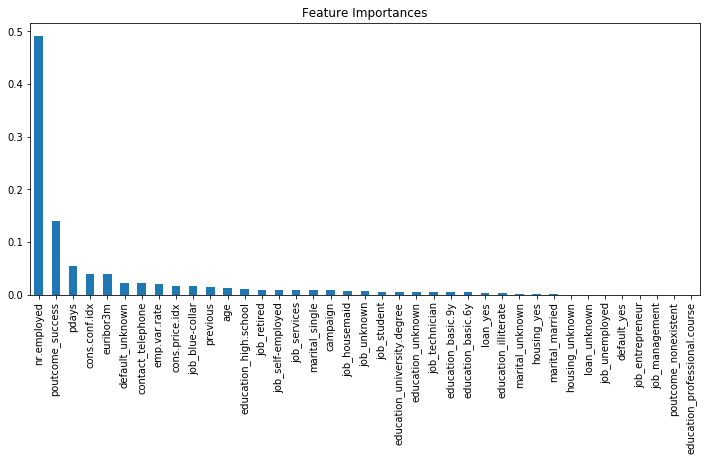

In [111]:
FeatureImportancesPlot(xgb, xtr)

# Conclusion
Our speculation was true, month and day of week have little to no effect to our model. We lose 0.01 roc auc score from random forest but xgboost's remained the same.

# Contact Treatment
Now lets try to drop the 'contact' column. Intuitively, this feature have no effect since no matter the method of contact, the information (marketing) is received by the client.

In [112]:
contactTreated = df.drop(columns=['y', 'duration', 'month', 'day_of_week', 'contact'])
objects = contactTreated.select_dtypes(include=['object']).columns
contactTreated = pd.get_dummies(contactTreated, drop_first=True, columns=objects)

In [113]:
xtr, xts, ytr, yts = train_test_split(contactTreated, target, test_size = 0.30, random_state=101)

### Random Forest

In [114]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Confusion Matrix: 
         P No  P Yes
A No   25541     29
A Yes    146   3115 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     25570
           1       0.99      0.96      0.97      3261

    accuracy                           0.99     28831
   macro avg       0.99      0.98      0.98     28831
weighted avg       0.99      0.99      0.99     28831

Accuracy : 0.9939301446359821
Log Loss:  0.06914948498965649


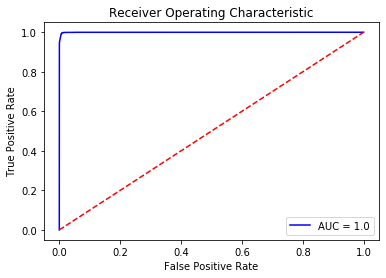

In [115]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10625    353
A Yes   1005    374 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     10978
           1       0.51      0.27      0.36      1379

    accuracy                           0.89     12357
   macro avg       0.71      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357

Accuracy : 0.890102775754633
Log Loss:  0.558508211754076


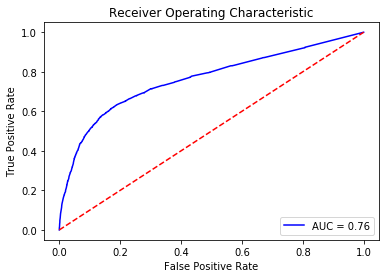

In [116]:
Error(xts, yts, rfc)

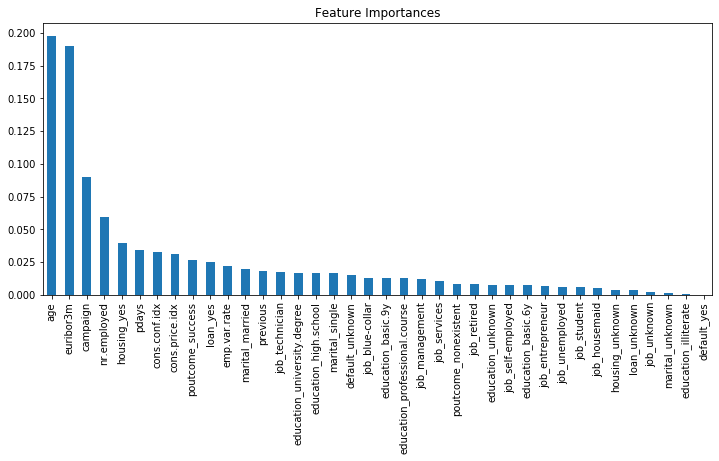

In [117]:
FeatureImportancesPlot(rfc, xtr)

### XGBoost

In [118]:
xgb = XGBClassifier()
xgb.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion Matrix: 
         P No  P Yes
A No   25269    301
A Yes   2524    737 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.71      0.23      0.34      3261

    accuracy                           0.90     28831
   macro avg       0.81      0.61      0.64     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9020151919808539
Log Loss:  0.2684630281190794


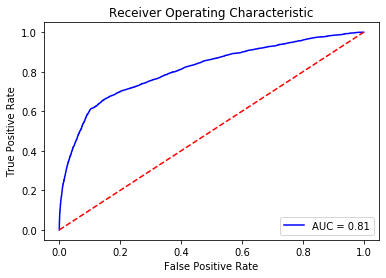

In [119]:
Error(xtr, ytr, xgb)

Confusion Matrix: 
         P No  P Yes
A No   10846    132
A Yes   1083    296 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.69      0.21      0.33      1379

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.9016751638747269
Log Loss:  0.27473377400739085


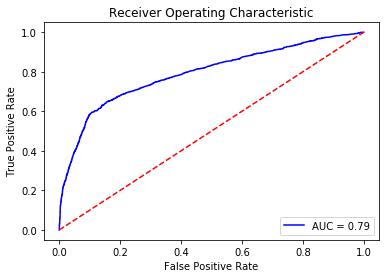

In [120]:
Error(xts, yts, xgb)

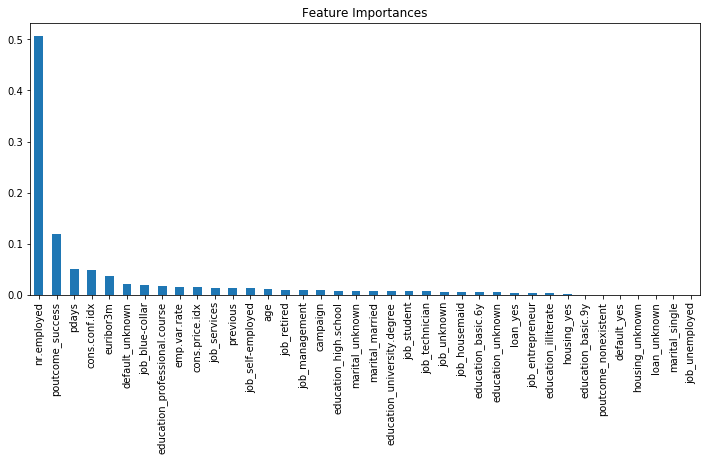

In [121]:
FeatureImportancesPlot(xgb, xtr)

# Dropping more features

In [122]:
pd.Series(xgb.feature_importances_, xtr.columns).sort_values(ascending=False)

nr.employed                      0.507069
poutcome_success                 0.118650
pdays                            0.051083
cons.conf.idx                    0.049096
euribor3m                        0.037086
default_unknown                  0.021313
job_blue-collar                  0.017999
education_professional.course    0.016905
emp.var.rate                     0.015118
cons.price.idx                   0.014407
job_services                     0.012652
previous                         0.012177
job_self-employed                0.012159
age                              0.010734
job_retired                      0.008705
job_management                   0.008649
campaign                         0.008342
education_high.school            0.008073
marital_unknown                  0.008013
marital_married                  0.007006
education_university.degree      0.006797
job_student                      0.006470
job_technician                   0.006393
job_unknown                      0

In [123]:
final_df = df.drop(columns=['y', 'duration', 'month', 'day_of_week', 'contact', 'loan', 'default', 'poutcome'])
objects = final_df.select_dtypes(include=['object']).columns
final_df = pd.get_dummies(final_df, drop_first=True, columns=objects)

In [124]:
xtr, xts, ytr, yts = train_test_split(final_df, target, test_size=0.30, random_state=101)

### Random Forest

In [125]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Confusion Matrix: 
         P No  P Yes
A No   25529     41
A Yes    202   3059 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     25570
           1       0.99      0.94      0.96      3261

    accuracy                           0.99     28831
   macro avg       0.99      0.97      0.98     28831
weighted avg       0.99      0.99      0.99     28831

Accuracy : 0.9915715722659637
Log Loss:  0.07122355620333581


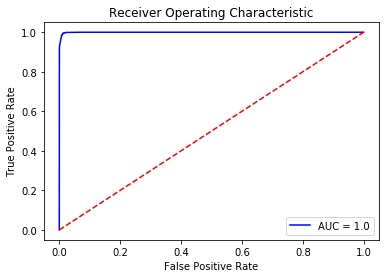

In [126]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10586    392
A Yes    997    382 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     10978
           1       0.49      0.28      0.35      1379

    accuracy                           0.89     12357
   macro avg       0.70      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357

Accuracy : 0.8875940762320952
Log Loss:  0.59992702318277


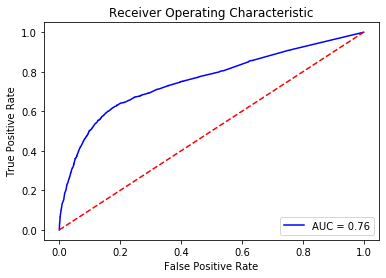

In [127]:
Error(xts, yts, rfc)

### XGBoost

In [128]:
xgb = XGBClassifier()
xgb.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Confusion Matrix: 
         P No  P Yes
A No   25253    317
A Yes   2519    742 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.70      0.23      0.34      3261

    accuracy                           0.90     28831
   macro avg       0.80      0.61      0.65     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9016336582151157
Log Loss:  0.26864898655390645


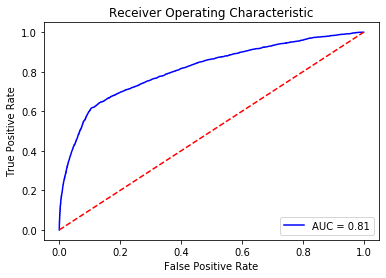

In [129]:
Error(xtr, ytr, xgb)

Confusion Matrix: 
         P No  P Yes
A No   10839    139
A Yes   1083    296 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.21      0.33      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.9011086833373796
Log Loss:  0.27489496162409943


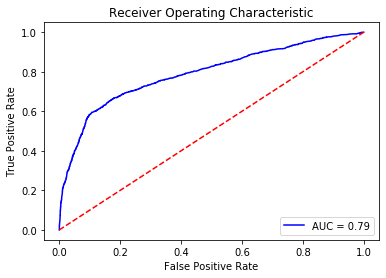

In [130]:
Error(xts, yts, xgb)

# Solving Imbalance Classification

### a. Grid Search

### Random Forest

In [131]:
from sklearn.model_selection import GridSearchCV

parameters = {'class_weight':({0:1, 1:5},{0:1, 1:3},{0:1, 1:4}),
             'min_samples_leaf': (22,20,18)}
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
dt = GridSearchCV(rfc, parameters, 
                  scoring = ['recall','roc_auc'],
                  refit='roc_auc',cv=5)
dt.fit(xtr, ytr)
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=22,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [132]:
rfc = dt.best_estimator_

Confusion Matrix: 
         P No  P Yes
A No   23381   2189
A Yes   1442   1819 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     25570
           1       0.45      0.56      0.50      3261

    accuracy                           0.87     28831
   macro avg       0.70      0.74      0.71     28831
weighted avg       0.89      0.87      0.88     28831

Accuracy : 0.8740591724185772
Log Loss:  0.3068745556320158


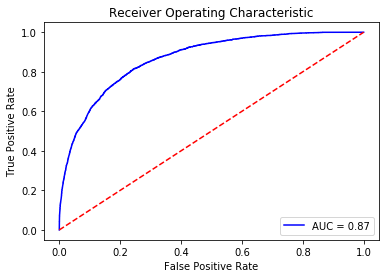

In [133]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10016    962
A Yes    645    734 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93     10978
           1       0.43      0.53      0.48      1379

    accuracy                           0.87     12357
   macro avg       0.69      0.72      0.70     12357
weighted avg       0.88      0.87      0.88     12357

Accuracy : 0.8699522537832808
Log Loss:  0.32719817161381975


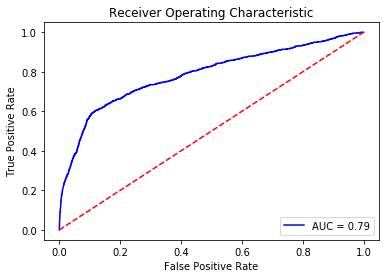

In [134]:
Error(xts, yts, rfc)

### XGBoost

In [135]:
parameters = {'class_weight':({0:1, 1:5},{0:1, 1:3},{0:1, 1:4}),
             'min_samples_leaf': (22,20,18)}
# rfc = RandomForestClassifier(n_estimators=100, random_state=101)
xgb = XGBClassifier(n_estimators=100, random_state=101)
dt = GridSearchCV(xgb, parameters, 
                  scoring = ['recall','roc_auc'],
                  refit='roc_auc',cv=5)
dt.fit(xtr, ytr)
dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 5},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=22, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [136]:
# rfc = dt.best_estimator_
xgb = dt.best_estimator_

# Training Error

Confusion Matrix: 
         P No  P Yes
A No   25253    317
A Yes   2519    742 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.70      0.23      0.34      3261

    accuracy                           0.90     28831
   macro avg       0.80      0.61      0.65     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9016336582151157
Log Loss:  0.26864898655390645


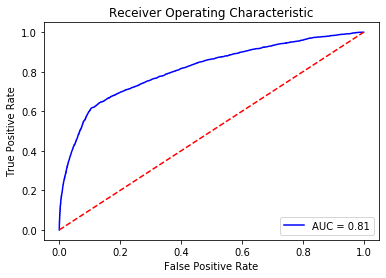

In [137]:
Error(xtr, ytr, xgb)

# Test Error

Confusion Matrix: 
         P No  P Yes
A No   10839    139
A Yes   1083    296 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.21      0.33      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.9011086833373796
Log Loss:  0.27489496162409943


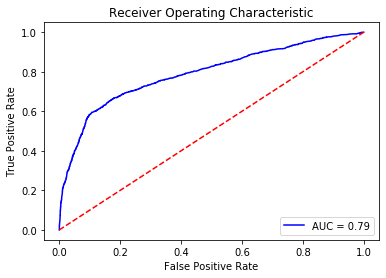

In [138]:
Error(xts, yts, xgb)

### b. Oversampling

In [145]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [146]:
ytr.value_counts()

0    25570
1     3261
Name: y, dtype: int64

In [147]:
ros = RandomOverSampler(random_state=101)
# smot = SMOTE(random_state=101)

X_ros, y_ros = ros.fit_sample(xtr, ytr)
# X_smot, y_smot = smot.fit_sample(xtr, ytr)

In [148]:
pd.Series(y_ros).value_counts()
# pd.Series(y_smot).value_counts()

1    25570
0    25570
dtype: int64

In [149]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101, min_samples_leaf=20)
# xgb = XGBClassifier(n_estimators=100, random_state=101, min_samples_leaf=22)

In [150]:
rfc.fit(X_ros, y_ros)
# rfc.fit(X_smot, y_smot)
# rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

# Training Error

Confusion Matrix: 
         P No  P Yes
A No   22505   3065
A Yes   1033   2228 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     25570
           1       0.42      0.68      0.52      3261

    accuracy                           0.86     28831
   macro avg       0.69      0.78      0.72     28831
weighted avg       0.90      0.86      0.87     28831

Accuracy : 0.8578613298185981
Log Loss:  0.4349474021791695


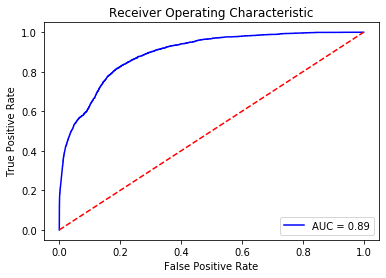

In [151]:
Error(xtr, ytr, rfc)

# Test Error

Confusion Matrix: 
        P No  P Yes
A No   9643   1335
A Yes   541    838 

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     10978
           1       0.39      0.61      0.47      1379

    accuracy                           0.85     12357
   macro avg       0.67      0.74      0.69     12357
weighted avg       0.88      0.85      0.86     12357

Accuracy : 0.8481832159909363
Log Loss:  0.47118267323799606


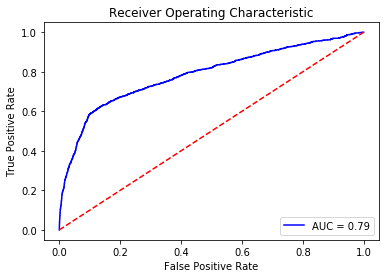

In [152]:
Error(xts, yts, rfc)

# PCA

In [153]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(n_components=5)

In [155]:
final_df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes'],
      dtype='object')

In [156]:
listPCA = []
for col in final_df.select_dtypes(include=['int64', 'float64']).columns:
    listPCA.append(col)
    
listPCA

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()
final_df[listPCA] = pd.DataFrame(scaler.fit_transform(final_df[listPCA]), columns=listPCA)

In [159]:
final_df[listPCA].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [160]:
pca.fit_transform(final_df[listPCA])

array([[-1.26917737,  0.88451017, -1.48679009, -0.03685898, -0.65778577],
       [-1.26902553,  0.9090104 , -1.54864196,  0.00458239, -0.7130374 ],
       [-1.27206217,  0.41900577, -0.31160452, -0.824245  ,  0.3919953 ],
       ...,
       [ 1.76810871, -0.59034335,  0.35914077,  0.89608762, -2.79840968],
       [ 1.80237528, -0.88615994,  0.9926706 ,  0.07800587, -2.25488599],
       [ 2.35283673,  0.8178364 , -0.0801279 ,  1.91466843, -3.93748659]])

In [161]:
pca.explained_variance_ratio_

array([0.43262262, 0.15072846, 0.11973066, 0.10840813, 0.09429445])

In [162]:
x_pca = pca.transform(final_df[listPCA])

In [163]:
dfPCA = pd.DataFrame(x_pca, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [164]:
uint8 = final_df.select_dtypes(include=['uint8']).columns
uint8

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'housing_unknown',
       'housing_yes'],
      dtype='object')

In [165]:
dfPCA[uint8] = final_df[uint8]
dfPCA.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes
0,-1.269177,0.884510,-1.486790,-0.036859,-0.657786,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.269026,0.909010,-1.548642,0.004582,-0.713037,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.272062,0.419006,-0.311605,-0.824245,0.391995,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-1.271607,0.492506,-0.497160,-0.699921,0.226240,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.269177,0.884510,-1.486790,-0.036859,-0.657786,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Random Forest

In [166]:
xtr, xts, ytr, yts = train_test_split(dfPCA, target, test_size=0.30, random_state=101)

In [167]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Confusion Matrix: 
         P No  P Yes
A No   25528     42
A Yes    202   3059 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     25570
           1       0.99      0.94      0.96      3261

    accuracy                           0.99     28831
   macro avg       0.99      0.97      0.98     28831
weighted avg       0.99      0.99      0.99     28831

Accuracy : 0.9915368873781694
Log Loss:  0.07295519815396985


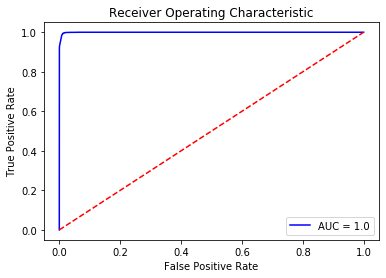

In [168]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10639    339
A Yes   1022    357 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     10978
           1       0.51      0.26      0.34      1379

    accuracy                           0.89     12357
   macro avg       0.71      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357

Accuracy : 0.8898599983814842
Log Loss:  0.5296801337871115


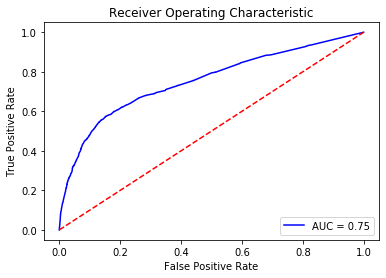

In [169]:
Error(xts, yts, rfc)

# PCA with Full DataFrame

In [170]:
non_objects = df.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
dfPCA = scaler.fit_transform(df[non_objects].drop(columns=['y', 'duration']))

In [171]:
pca = PCA(n_components=5)
x_PCA = pca.fit_transform(dfPCA)

In [172]:
dfPCA = pd.DataFrame(x_PCA, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])
dfPCA.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-1.269177,0.884510,-1.486790,-0.036859,-0.657786
1,-1.269026,0.909010,-1.548642,0.004582,-0.713037
2,-1.272062,0.419006,-0.311605,-0.824245,0.391995
3,-1.271607,0.492506,-0.497160,-0.699921,0.226240
4,-1.269177,0.884510,-1.486790,-0.036859,-0.657786


In [173]:
objects = df.select_dtypes(include=['object']).columns
dfPCA[objects] = df[objects]
dfPCA.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,-1.269177,0.884510,-1.486790,-0.036859,-0.657786,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,-1.269026,0.909010,-1.548642,0.004582,-0.713037,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,-1.272062,0.419006,-0.311605,-0.824245,0.391995,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,-1.271607,0.492506,-0.497160,-0.699921,0.226240,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,-1.269177,0.884510,-1.486790,-0.036859,-0.657786,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [174]:
dfPCA = pd.get_dummies(dfPCA, drop_first=True, columns=objects)

In [175]:
xtr, xts, ytr, yts = train_test_split(dfPCA, target, test_size=0.30, random_state=101)

# Random Forest 
### Full Train Data

In [176]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

Confusion Matrix: 
         P No  P Yes
A No   25548     22
A Yes    122   3139 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25570
           1       0.99      0.96      0.98      3261

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       0.99      1.00      0.99     28831

Accuracy : 0.9950053761576081
Log Loss:  0.06892747551245497


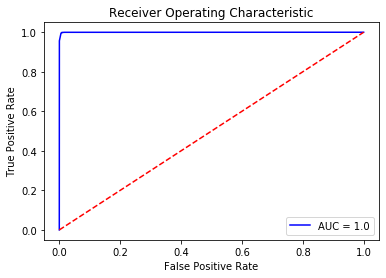

In [177]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10684    294
A Yes   1023    356 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     10978
           1       0.55      0.26      0.35      1379

    accuracy                           0.89     12357
   macro avg       0.73      0.62      0.65     12357
weighted avg       0.87      0.89      0.88     12357

Accuracy : 0.8934207331876669
Log Loss:  0.4854170321245191


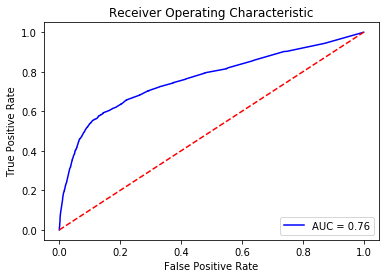

In [178]:
Error(xts, yts, rfc)

# Label Encoding
Let us just use the final_df that already had some features dropped

In [179]:
final_df = df.drop(columns=['y', 'duration', 'month', 'day_of_week', 'contact', 'loan', 'default', 'poutcome', 'job'])
# final_df = df.drop(columns=['y', 'duration'])
# final_df = df[['duration']]
final_df['age'] = final_df['age'].apply(lambda row: 69.6 if row > 69.6 else row)
objects = final_df.select_dtypes(include=['object']).columns

In [180]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in objects:
    final_df[col] = labelencoder.fit_transform(final_df[col])

In [181]:
final_df.describe()

,age,marital,education,housing,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.940623,1.172769,3.747184,1.071720,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.132696,0.608902,2.136482,0.985314,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,2.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,1.000000,3.000000,2.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,2.000000,6.000000,2.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.600000,3.000000,7.000000,2.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [182]:
xtr, xts, ytr, yts = train_test_split(final_df, target, test_size=0.30, random_state=101)

In [183]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

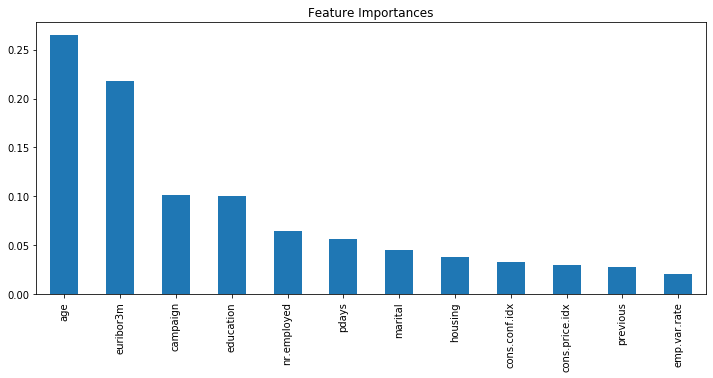

In [184]:
FeatureImportancesPlot(rfc, xtr)

Confusion Matrix: 
         P No  P Yes
A No   25516     54
A Yes    323   2938 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     25570
           1       0.98      0.90      0.94      3261

    accuracy                           0.99     28831
   macro avg       0.98      0.95      0.97     28831
weighted avg       0.99      0.99      0.99     28831

Accuracy : 0.9869237973015157
Log Loss:  0.07565580249749389


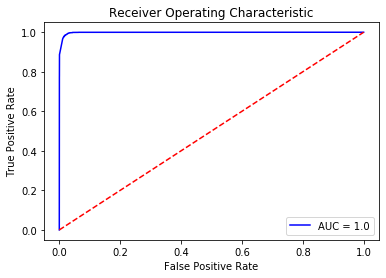

In [185]:
Error(xtr, ytr, rfc)

Confusion Matrix: 
         P No  P Yes
A No   10567    411
A Yes    979    400 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     10978
           1       0.49      0.29      0.37      1379

    accuracy                           0.89     12357
   macro avg       0.70      0.63      0.65     12357
weighted avg       0.87      0.89      0.87     12357

Accuracy : 0.8875131504410455
Log Loss:  0.6710446082797632


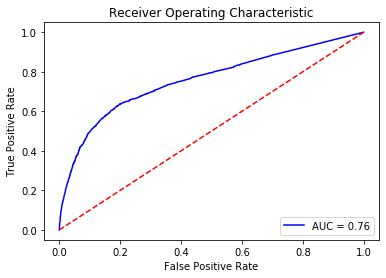

In [186]:
Error(xts, yts, rfc)

In [187]:
xgb.fit(xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 5},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=22, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

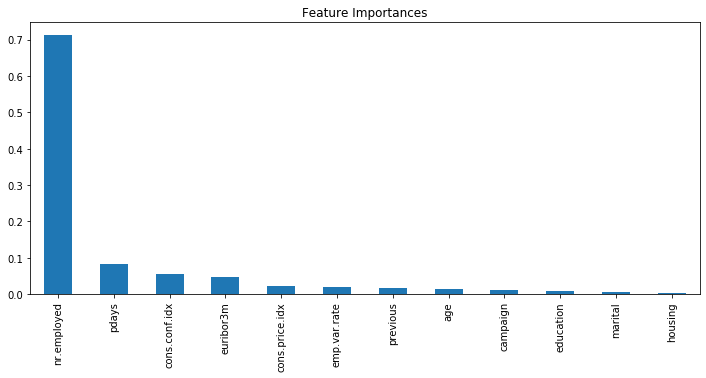

In [188]:
FeatureImportancesPlot(xgb, xtr)

Confusion Matrix: 
         P No  P Yes
A No   25271    299
A Yes   2539    722 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.71      0.22      0.34      3261

    accuracy                           0.90     28831
   macro avg       0.81      0.60      0.64     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9015642884395269
Log Loss:  0.26847812547125066


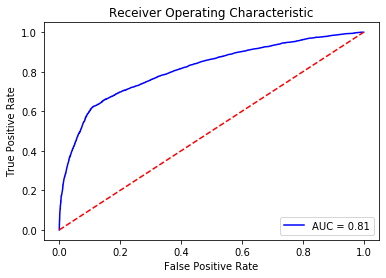

In [189]:
Error(xtr, ytr, xgb)

Confusion Matrix: 
         P No  P Yes
A No   10845    133
A Yes   1095    284 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.21      0.32      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.900623128591082
Log Loss:  0.2742183995403758


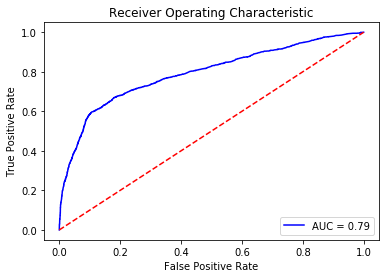

In [190]:
Error(xts, yts, xgb)

# Conclusion of Label Encoding
We can use either one hot or label encoding, they do not significantly improve or make our model worse.

# Final Model

In [191]:
final_df = df.drop(columns=['y', 'duration', 'month', 'day_of_week', 'contact', 'loan', 'default', 'poutcome', 'job',
                           'housing', 'marital'])
# final_df = df.drop(columns=['y', 'duration'])
# final_df = df[['duration']]
final_df['age'] = final_df['age'].apply(lambda row: 69.6 if row > 69.6 else row)
objects = final_df.select_dtypes(include=['object']).columns

In [192]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in objects:
    final_df[col] = labelencoder.fit_transform(final_df[col])

In [193]:
xtr, xts, ytr, yts = train_test_split(final_df, target, test_size=0.30, random_state=101)

In [194]:
parameters = {'class_weight':({0:1, 1:5},{0:1, 1:3},{0:1, 1:4}),
             'min_samples_leaf': (22,23,21)}
# rfc = RandomForestClassifier(n_estimators=100, random_state=101)
xgb = XGBClassifier(n_estimators=100, random_state=101)
dt = GridSearchCV(xgb, parameters, 
                  scoring = ['precision','roc_auc'],
                  refit='precision',cv=5)
dt.fit(xtr, ytr)
dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 5},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=22, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [195]:
xgb = dt.best_estimator_

In [196]:
pd.Series(xgb.feature_importances_, xtr.columns).sort_values(ascending=False)

nr.employed       0.717909
pdays             0.086246
cons.conf.idx     0.058648
euribor3m         0.047174
cons.price.idx    0.020573
emp.var.rate      0.018965
previous          0.016159
age               0.014717
campaign          0.010672
education         0.008938
dtype: float32

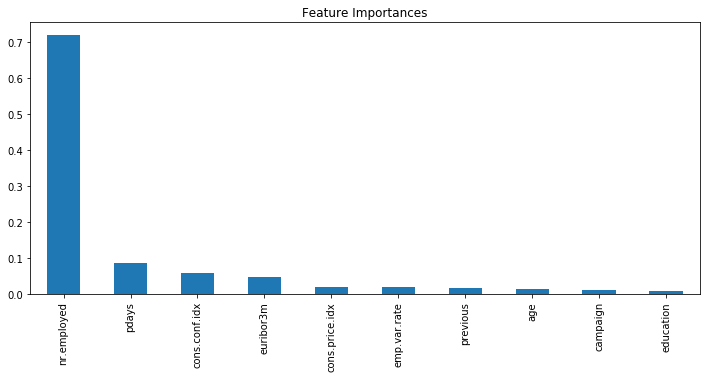

In [197]:
FeatureImportancesPlot(xgb, xtr)

Confusion Matrix: 
         P No  P Yes
A No   25247    323
A Yes   2503    758 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     25570
           1       0.70      0.23      0.35      3261

    accuracy                           0.90     28831
   macro avg       0.81      0.61      0.65     28831
weighted avg       0.89      0.90      0.88     28831

Accuracy : 0.9019805070930595
Log Loss:  0.2685281853226926


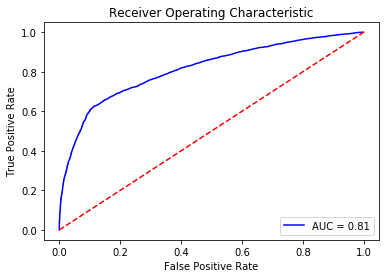

In [198]:
Error(xtr, ytr, xgb)

Confusion Matrix: 
         P No  P Yes
A No   10835    143
A Yes   1076    303 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.22      0.33      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

Accuracy : 0.9013514607105284
Log Loss:  0.2741034668490415


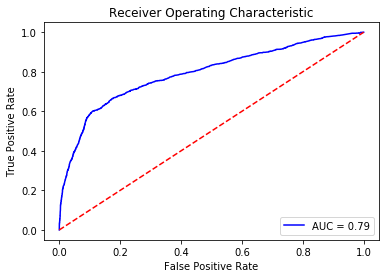

In [199]:
Error(xts, yts, xgb)

# Model Deployment

In [200]:
len(final_df)

41188

In [201]:
final_df.describe()

,age,education,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.940623,3.747184,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.132696,2.136482,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,2.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,3.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,6.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.600000,7.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [202]:
final_df['campaign'] = final_df['campaign'].apply(lambda row: 6 if row > 6 else row)

In [203]:
final_df.describe()

,age,education,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.940623,3.747184,2.275274,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.132696,2.136482,1.550510,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,2.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,3.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,6.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.600000,7.000000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [204]:
parameters = {'class_weight':({0:1, 1:5},{0:1, 1:3},{0:1, 1:4}),
             'min_samples_leaf': (22,23,21)}
# rfc = RandomForestClassifier(n_estimators=100, random_state=101)
xgb = XGBClassifier(n_estimators=100, random_state=101)
dt = GridSearchCV(xgb, parameters, 
                  scoring = ['recall','roc_auc'],
                  refit='roc_auc',cv=5)
dt.fit(final_df, target)
dt.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 5},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=22, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [205]:
xgb = dt.best_estimator_

Confusion Matrix: 
         P No  P Yes
A No   36102    446
A Yes   3602   1038 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     36548
           1       0.70      0.22      0.34      4640

    accuracy                           0.90     41188
   macro avg       0.80      0.61      0.64     41188
weighted avg       0.89      0.90      0.88     41188

Accuracy : 0.9017189472661941
Log Loss:  0.2696183889717094


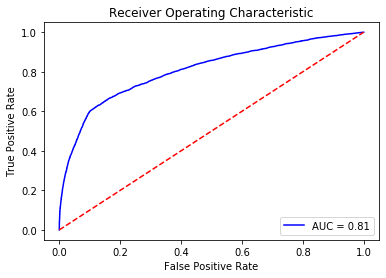

In [206]:
Error(final_df, target, xgb)

In [207]:
import joblib
joblib.dump(xgb, 'xgb')

['xgb']

# Create Records CSV 

In [208]:
a = list(final_df.columns)
a.append('y')

In [209]:
hello = pd.DataFrame(columns=a)

In [210]:
hello.to_csv('new.csv')

In [211]:
haha = pd.read_csv('new.csv')